<a href="https://colab.research.google.com/github/yuleidner/DAV-6150/blob/main/M4_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Top'></a>
# Data Science: Module 4
### Practical Challenge: Feature Selection & Dimensionality Reduction
#### Alan Leidner working with Jacob Goodman Oct 10, 2021
Assignment: https://yu.instructure.com/courses/50398/assignments/191951

#Instructions
*** You may work in small groups of no more than three (3) people for this Assignment ***


When the number of explanatory variables is relatively large with respect to the number of observations contained
within a data set, data science practitioners need to know how to effectively reduce the number of explanatory
variables required for the intended model. 

For this assignment your primary task is to apply feature selection
and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear
regression model that predicts the number of times an online news article will be shared. 

The data set you will be using is sourced from the UC Irvine machine learning archive:
 https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
The data set is comprised of 39,797 observations and 61 attributes. Please refer to the UCI web page for
further details on these variables. **The shares variable will serve as the response variable for your regression
model**. As such, you are to apply your feature selection / dimensionality reduction expertise to the remaining
60 attributes for purposes of identifying the explanatory variables that you believe will be most useful when
included in a linear regression model that estimates shares.
Once you are comfortable in your understanding of the various data attributes, get started on the assignment
as follows:


1) <strike>Load the provided M4_Data.csv file to your DAV 6150 Github Repository.</strike>


2) <strike>Then, using a Jupyter Notebook, read the data set from your Github repository and load it into a
Pandas dataframe.</strike>


3) Using your Python skills, perform some basic exploratory data analysis (EDA) to ensure you understand
the nature of each of the variables (including the response variable). Your EDA writeup should include
any insights you are able to derive from your statistical analysis of the attributes and the accompanying
exploratory graphics you create (e.g., bar plots, box plots, histograms, line plots, etc.). You should also
try to identify some preliminary predictive inferences, e.g., do any of the explanatory variables appear
to be relatively more “predictive” of the response variable? There are a variety of ways you can
potentially identify such relationships between the explanatory variables and the response variable. It
is up to you as the data science practitioner to decide how you go about your EDA, including selecting
appropriate statistical metrics to be calculated + which types of exploratory graphics to make use of.
Your goal should be to provide an EDA that is thorough and succinct without it being so detailed that a
reader will lose interest in it.


4) Using your Python skills, apply your knowledge of feature selection and dimensionality reduction to the
60 candidate explanatory variables to identify variables that you believe will prove to be relatively
useful within the required linear regression model. Your work here should reflect some of the
knowledge you have gained via your EDA work. While selecting your features, be sure to consider the
tradeoff between model performance and model simplification, e.g., if you are reducing the complexity
of your model, are you sacrificing too much in the way of Adjusted R^2 (or some other performance
measure)? The ways in which you implement your feature selection and/or dimensionality reduction
decisions are up to you as a data science practitioner to determine: will you use filtering methods? 
PCA? Stepwise search? etc. It is up to you to decide upon your own preferred approach. Be sure to
include an explanatory narrative that justifies your decision making process.


5) Train/cross validate your model and report on its performance.
Your deliverable for this assignment is your Jupyter Notebook. It should contain a combination of Python
code cells and explanatory narratives contained within properly formatted Markdown cells. 

#Grading
The Notebook should contain (at a minimum) the following sections (including the relevant Python code for each section):


1) Introduction (5 Points): Summarize the problem + explain the steps you plan to take to address the
problem


2) Exploratory Data Analysis (30 Points): Explain + present your EDA work including any conclusions you
draw from your analysis including any preliminary predictive inferences. This section should include
any Python code used for the EDA.


3) Feature Selection / Dimensionality Reduction (45 Points): Explain + present your feature selection /
dimensionality work, including any Python code used as part of that process.


4) Regression Model Evaluation (15): Explain + present your linear regression model and discuss its
accuracy. This section should include any Python code used to construction + evaluate your regression
model.


5) Conclusions (5 Points)
Your Jupyter Notebook deliverable should be similar to that of a publication-quality / professional caliber
document and should include clearly labeled graphics, high-quality formatting, clearly defined section and
sub-section headers, and be free of spelling and grammar errors. Furthermore, your Pythion code should
include succinct explanatory comments.
Upload your Jupyter Notebook within the provided M4 Assignment Canvas submission portal. Be sure to save
your Notebook using the following nomenclature: first initial_last name_M4_assn" (e.g., J_Smith_M4_assn_).
Small groups should identity all group members at the start of the Jupyter Notebook and each team
member should submit their own copy of the team’s work within Canvas.

## Introduction
This notebook will explore a collection af articles from mashable

In [ ]:
#Import packages for data frames 
import numpy as np
import pandas as pd
#import missingno as msno

# import pyplot and seaborn for graph creating
import matplotlib.pyplot as plt
import seaborn as sns 

# load the train_test_split function from the sklearn.model_selection module
#from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
#from sklearn.impute import KNNImputer
#from sklearn.linear_model import LinearRegression# load the LinearRegression() function from sklearn's 'linear_model' sub-library
#from sklearn.model_selection import cross_val_score# load the cross_val_score function from the sklearn.model_selection module
#from sklearn.experimental import enable_iterative_imputer #because it is experimental, it needs to be explicitly enabled
#from sklearn.impute import IterativeImputer#loading IterativeImputer package
#from sklearn.preprocessing import MinMaxScaler
#from sklearn import preprocessing 


# box cox to be utlized in standarization 
#from scipy.stats import boxcox
#from sklearn import preprocessing


#This ingores depreciation warnings, which will make the code more readable
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)



## Exploratory Data Analysis <a id='1'></a>
The dataset was loaded into the DAV 6150 Github Repository here: https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M4/M4_Data.csv. This notebook will now load the table into a Pandas dataframe for analysis.

In [ ]:
# read a set of sample data from github. It contains information related to cars and insurance
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M4/M4_Data.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None) #expands df to display all columns
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


###Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?  

**kw and self_reference** <- the columns are explained in the original [paper](https://core.ac.uk/download/pdf/55638607.pdf)
>Some of the features are dependent of particularities of the Mashable
service: articles often reference other articles published in the same service; and
articles have meta-data, such as keywords, data channel type and total number
of shares (when considering Facebook, Twitter, Google+, LinkedIn, StumbleUpon and Pinterest). Thus, we extracted the minimum, average and maximum
number of shares (known before publication) of all Mashable links cited in the
article. Similarly, we rank all article keyword average shares (known before publication), in order to get the worst, average and best keywords. For each of these
keywords, we extract the minimum, average and maximum number of shares.    
\- <cite>K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News.</cite>

19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable

**weekday** dummy variables describing the day of the week the article was published 
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?


**weekend** indicator varible for whether article was published on a weekend 
38. is_weekend: Was the article published on the weekend?

**LDA** attributes explained in source [paper](https://core.ac.uk/download/pdf/55638607.pdf)
>The Latent
Dirichlet Allocation (LDA) algorithm was applied to all Mashable texts
(known before publication) in order to first identify the five top relevant topics and then measure the closeness of current article to such topics  
\- <cite>K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News.</cite>

39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4

**Subjectivity and Polarity** attributes explained in source [paper](https://core.ac.uk/download/pdf/55638607.pdf)
>To compute the subjectivity and polarity sentiment analysis, we adopted the Pattern web mining module (http://www.clips.ua.ac.be/pattern) [Tom De Smedt, Lucas Nijs, and Walter Daelemans. Creative web services with
pattern. In Proceedings of the Fifth International Conference on Computational
Creativity, 2014.], allowing the computation of sentiment polarity and subjectivity scores.  
\- <cite>K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News.</cite>

44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level

**shares** The number of times an article has been shared. this is our Target or what we are trying to predict for new articles.
60. shares: Number of shares (target)

In [ ]:
## a few methods will now be called to view summaries of this dataframe
df.shape

(39644, 61)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Thankfully, there are no missing values, and aside from the URL, all features are numerical.

In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

### Univariate Analysis
Column by Column EDA





####shares (response variable)
Response Variable (indicates # of cases of wine sold)


Skewness: 33.963885
Kurtosis: 1832.672657


count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

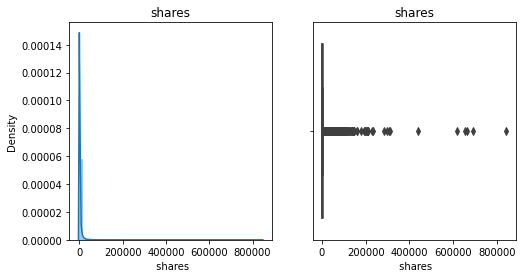

In [ ]:
#Create a histogram and boxplot side by side
i = df[' shares']

sns.set_style();
plt.figure(figsize=(8,4))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('shares')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i);#calls a boxplot
plt.title('shares');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symetry)value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread
i.describe() #Adds summary statistics of the variable

Frustrating that there is a blank space before the name of our response variable. We will remove it, and any other spaces now to prevent formating problems while calling functions. We also see some extreme outliers here. Let's examine them now.

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
share_outliers = df[np.abs(df['shares'] - df['shares'].mean() ) > (3 * df['shares'].std() )]
share_outliers.shape

(308, 61)

In [ ]:
share_outliers.shares.describe()

count       308.000000
mean      85127.915584
std       93292.083499
min       38400.000000
25%       47100.000000
50%       57150.000000
75%       87150.000000
max      843300.000000
Name: shares, dtype: float64

While these are clear outliers from the media 1400 shares, they are likely to be datapoints of high value. It is likely that anyone analyzing this dataset would want to find the values that achieved these unusual results. At most I would normalize this variable, if that improved the model.

#### url
This column is the link to the website being shared in the dataset. It acts as natural index, but is not a predictor in our model as indicated by the attribute information. We can chech to see if there are any duplicates though.

In [ ]:
df['url'].duplicated().sum()

0

There are no duplicates for us to worry about. We will drop this feature from our model.

#### timedelta

Skewness: 0.120504


count    39644.000000
mean       354.530471
std        214.163767
min          8.000000
25%        164.000000
50%        339.000000
75%        542.000000
max        731.000000
Name: timedelta, dtype: float64

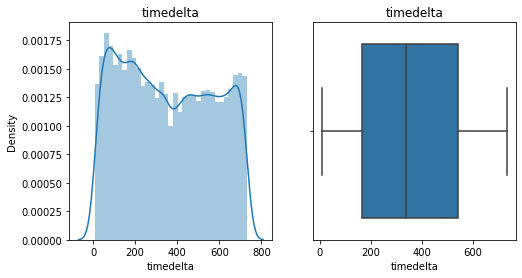

In [ ]:
#Create a histogram and boxplot side by side for timedelta
j= 1
i= df.iloc[:,j]

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title(df.columns[j]);
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This variable seems relatively well distributed, if bi-model. However, the data attribute information explicitly states that they do not consider the time differential between page publication, and the colection of the study metrics to be predictive. We will drop this feature from our dataset.

####n_tokens_title

Skewness: 0.165320


count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64

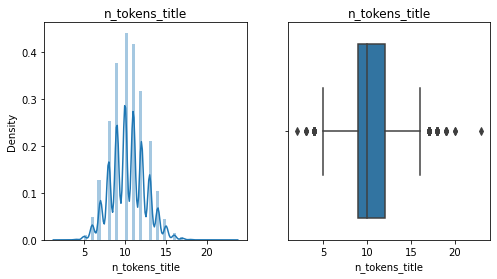

In [ ]:
#Create a histogram and boxplot side by side for n_tokens_title
j= 2
i= df.iloc[:,j]

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title(df.columns[j]);
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Number of words in the title. This seems well distributed, and gaussian. No further data manipulation needed.

####n_tokens_content

Skewness: 2.945422


count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

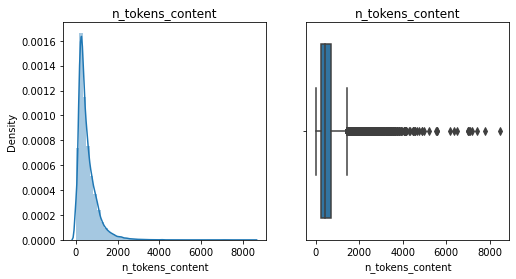

In [ ]:
#Create a histogram and boxplot side by side for n_tokens_content
j= 3
i= df.iloc[:,j]

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title(df.columns[j]);
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Number of words in the article content. This has a number of outliers, skewing right.

It is also weird that some articles have no words, though they may just contain a picture or video. We know from above that they at least have titles.

We will standardize these values.

####n_unique_tokens

Skewness: 198.655116


count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max        701.000000
Name: n_unique_tokens, dtype: float64

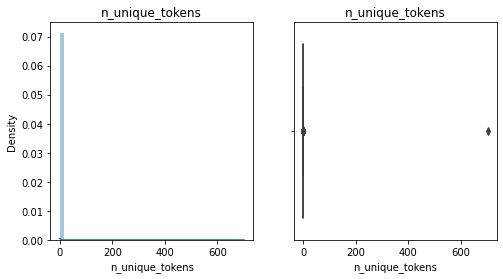

In [ ]:
#Create a histogram and boxplot side by side for n_unique_tokens
j= 4
i= df.iloc[:,j]

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title(df.columns[j]);
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Rate of unique words in the content. This has extreme outliers, which we will look at now.

In [ ]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
n_unique_tokens_outliers = df[np.abs(df['n_unique_tokens'] - df['n_unique_tokens'].mean() ) > (3 * df['n_unique_tokens'].std() )]
n_unique_tokens_outliers.shape

(1, 61)

This has 1 extreme outlier, which we will examine.

In [ ]:
print(df[df.n_unique_tokens == df.n_unique_tokens.max()])

                                                     url  timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...      142.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037             9.0            1570.0            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
31037                     650.0       11.0            10.0      51.0   

       num_videos  average_token_length  num_keywords  \
31037         0.0              4.696178           7.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
31037                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
31037                  0.0                     0.0                   0.0   

       data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  \
31037                    0.0        -1.0       778.0  143.714286     231

It looks like this dataset does not include the full url of the article. From the portion of the url available, and the total word count being slightly more than double the unique word count, I would guess that this article either is a list of foriegn words, or possibly includes a foreign translation. Either way, I believe this feature can have a significantly higher chance of being predictive in our model if we drop this row during our data preperation step.

####n_non_stop_words

Skewness: 198.792445


count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64

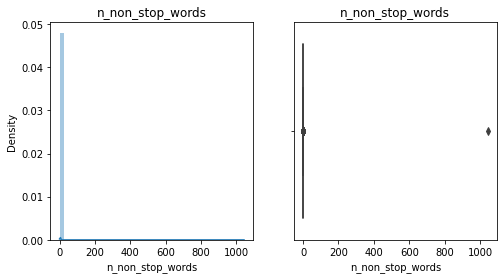

In [ ]:
#Create a histogram and boxplot side by side for n_non_stop_words
j= 5
i= df.iloc[:,j]

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title(df.columns[j]);
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Stop words are "the words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language"*

Non-stop words would then be unique words. This feature seems to suffer from the same problme as n_unique_tokens, which makes sense. Let's check to make sure.

*https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

In [ ]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
n_non_stop_words_outliers = df[np.abs(df['n_non_stop_words'] - df['n_non_stop_words'].mean() ) > (3 * df['n_non_stop_words'].std() )]
n_non_stop_words_outliers.shape

(1, 61)

In [ ]:
print(df[df.n_non_stop_words == df.n_non_stop_words.max()])

                                                     url  timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...      142.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037             9.0            1570.0            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
31037                     650.0       11.0            10.0      51.0   

       num_videos  average_token_length  num_keywords  \
31037         0.0              4.696178           7.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
31037                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
31037                  0.0                     0.0                   0.0   

       data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  \
31037                    0.0        -1.0       778.0  143.714286     231

The same article from above is impacting the number of non stop words, which we would expect from "unique" words. Our intention to drop this row is re-inforced.

####n_non_stop_unique_tokens

Skewness: 198.443294


count    39644.000000
mean         0.689175
std          3.264816
min          0.000000
25%          0.625739
50%          0.690476
75%          0.754630
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64

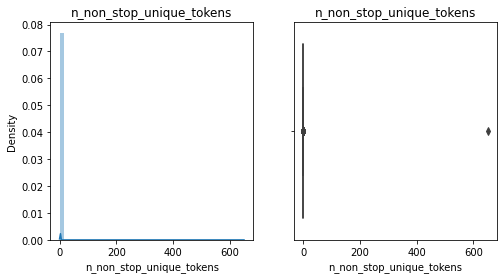

In [ ]:
#Create a histogram and boxplot side by side for n_non_stop_unique_tokens
j= 6
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Rate of unique non-stop words in the content. This suffers from the same outlier row

####num_hrefs

Skewness: 4.013495


count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64

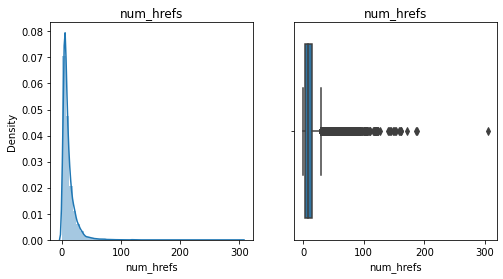

In [ ]:
#Create a histogram and boxplot side by side for num_hrefs
j= 7
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Number of links in the article.

In [ ]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
num_hrefs_outliers = df[np.abs(i - i.mean() ) > (3 * i.std() )]
num_hrefs_outliers.shape

(731, 61)

There are 871 outliers in the rightskewed model. This will benefit from normalization, and possibly standardization.

#### num_self_hrefs

Skewness: 5.172751


count    39644.000000
mean         3.293638
std          3.855141
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_hrefs, dtype: float64

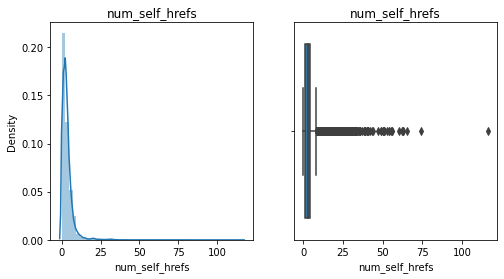

In [ ]:
#Create a histogram and boxplot side by side for num_self_hrefs
j= 8
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Number of links to other articles published by Mashable. I would expect these to be counted in the num_hrefs feature as well.

This feature is skewed and should be normalized and possibly standardized.

####num_imgs

Skewness: 3.946596


count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64

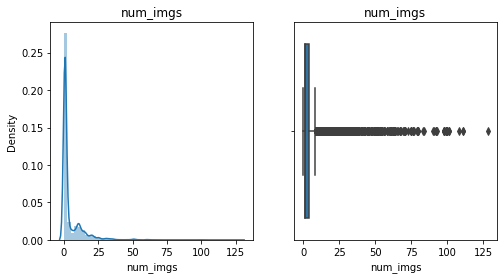

In [ ]:
#Create a histogram and boxplot side by side for num_imgs
j= 9
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Right skewed. Normalize, Standardize

####num_videos

Skewness: 7.019533


count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

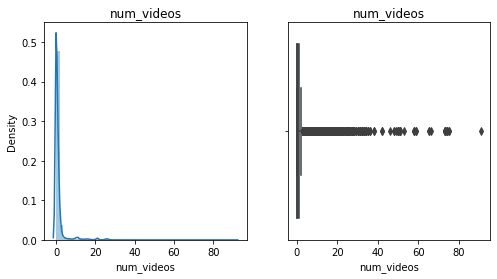

In [ ]:
#Create a histogram and boxplot side by side for num_videos
j= 10
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

normalize, standardize. correlated with num_images?

####average_token_length

Skewness: -4.576012


count    39644.000000
mean         4.548239
std          0.844406
min          0.000000
25%          4.478404
50%          4.664082
75%          4.854839
max          8.041534
Name: average_token_length, dtype: float64

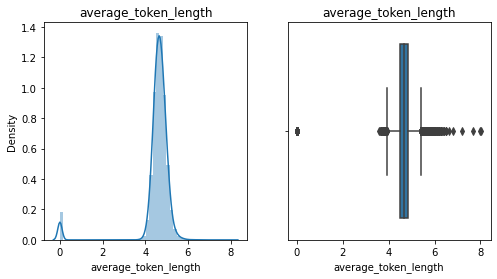

In [ ]:
#Create a histogram and boxplot side by side for average_token_length
j= 11
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Average length of the words in the content. The zero values are concerning here, though there are articles that have no words.

In [ ]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
zero_avg_token = df.loc[df['average_token_length'] == 0]
print(zero_avg_token.shape)
zero_avg_token.head()

(1181, 61)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
893,http://mashable.com/2013/01/23/actual-facebook...,715.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,1200.0,542.500000,0.0,51900.0,16928.571429,0.0,3647.272727,1923.430603,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.191383,0.028703,0.179282,0.572047,0.028586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.550000,-0.500000,0.050000,0.500000,2500
917,http://mashable.com/2013/01/23/fitness-gadget-...,715.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,217.0,2000.0,582.285714,0.0,51900.0,16080.000000,0.0,2939.239130,1596.149445,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.020362,0.133522,0.020019,0.020554,0.805543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,http://mashable.com/2013/01/25/data-vs-nature-...,713.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2500.0,669.000000,0.0,51900.0,17255.555556,0.0,4380.000000,2328.023284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.532843,0.022387,0.260606,0.023187,0.160977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,http://mashable.com/2013/01/26/infographics-ma...,712.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,217.0,1700.0,611.000000,0.0,51900.0,13628.571429,0.0,4408.000000,2332.097082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.885229,0.028718,0.028587,0.028866,0.028599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,http://mashable.com/2013/01/29/social-tv-chart...,709.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,217.0,1700.0,517.800000,440.0,51900.0,17628.000000,440.0,4423.333333,2305.412167,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020977,0.020356,0.020075,0.918569,0.020023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000


The number of articles with a zero avg token is concerning, though at least some of them have other content.

####num_keywords

Skewness: -0.147251


count    39644.000000
mean         7.223767
std          1.909130
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: num_keywords, dtype: float64

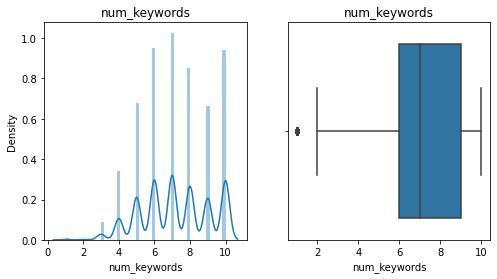

In [ ]:
#Create a histogram and boxplot side by side for num_keywords
j= 12
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Number of keywords in the metadata. These act as tags for the article. The distribution here is relatively normal. It seems there are a few articles that have no keywords, but that isn't very concerning. The distribution seems relatively normal.

####Data channel
we will explore doing EDA on data channel as if it was not already dummied 

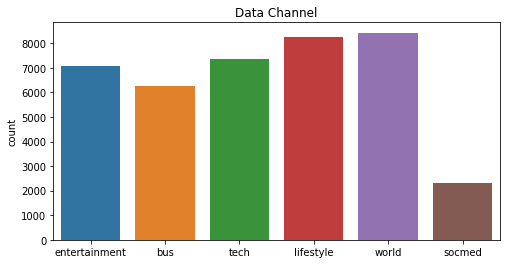

In [ ]:
j= 13 # starting column
h= 19 # ending column 
#assigning columns to a new variable
i= df.iloc[:,j:h]
# creating sum column to check for multiple values
i['sum'] = i.sum(axis=1)
# no mulitple values found droping columning and merging values to one column 
i.drop(columns='sum')
dedummied = i.idxmax(axis=1)

#parsing out category
dedummied = dedummied.str.split('_').apply(lambda x : x[-1])


plt.figure(figsize=(8,4))
#plt.subplot(1,2,1);#Histogram location
plt.title('Data Channel');
sns.countplot(dedummied);
#plt.subplot(1,2,2);#Boxplot location
#sns.boxplot();
#plt.title(df.columns[j]);
#print("Skewness: %f" %dedummied.skew()) #Adds Skew value
#i.describe() #Adds summary statistics of the variable"""




The Categorical dummy columns represented here: 
* data_channel_is_lifestyle: Is data channel 'Lifestyle'?
* data_channel_is_entertainment: Is data channel 'Entertainment'?
* data_channel_is_bus: Is data channel 'Business'?
* data_channel_is_socmed: Is data channel 'Social Media'?
* data_channel_is_tech: Is data channel 'Tech'?
* data_channel_is_world: Is data channel 'World'?

socmed is a signifiganly smaller class but not enough to combine. we will work to ensure it is properly represented in test/train/validation splits

@jacob Possible that SOCMED/lifestyle are underrepresented?

####kw_min_min

Skewness: 2.374947


count    39644.000000
mean        26.106801
std         69.633215
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64

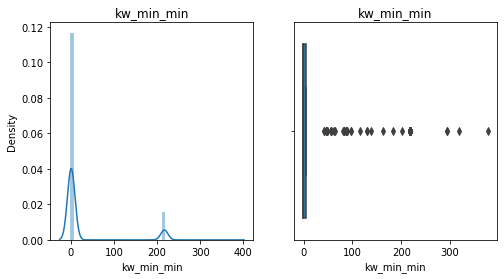

In [ ]:
#Create a histogram and boxplot side by side for kw_min_min
j= 19
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

It isn't clear what this feature represents;  we believe that this finds the keywords on the article, sums the total number of shares for each article tagged with that keyword, and then selects the keyword with the lowest total sum. The feature then displays the lowest recorded share count for any article with that keyword. The majority of the values are -1 though, and it is n't clear what that would represent here. Nevertheless, the distribution is skewed  to the right and would benefit from standardization and normalization.

####kw_max_min

Skewness: 35.328434


count     39644.000000
mean       1153.951682
std        3857.990877
min           0.000000
25%         445.000000
50%         660.000000
75%        1000.000000
max      298400.000000
Name: kw_max_min, dtype: float64

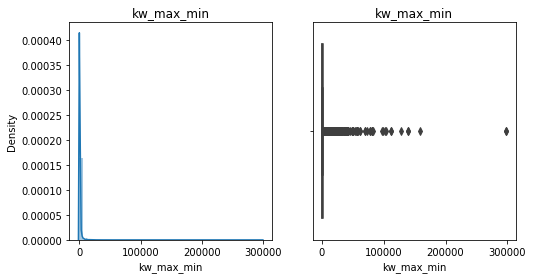

In [ ]:
#Create a histogram and boxplot side by side for kw_max_min
j= 20
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the greatest number of shares of articles sharing the worst performing keyword on the article in question. It would benefit from normalization and standardization.

####kw_avg_min

Skewness: 31.306108


count    39644.000000
mean       312.366967
std        620.783887
min         -1.000000
25%        141.750000
50%        235.500000
75%        357.000000
max      42827.857143
Name: kw_avg_min, dtype: float64

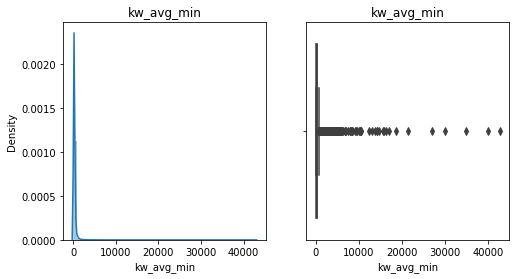

In [ ]:
#Create a histogram and boxplot side by side for kw_avg_min
j= 21
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the average number of shares of articles sharing the worst performing keyword to the article in question. It would benefit from normalization and standardization. 

####kw_min_max

Skewness: 10.386372


count     39644.000000
mean      13612.354102
std       57986.029357
min           0.000000
25%           0.000000
50%        1400.000000
75%        7900.000000
max      843300.000000
Name: kw_min_max, dtype: float64

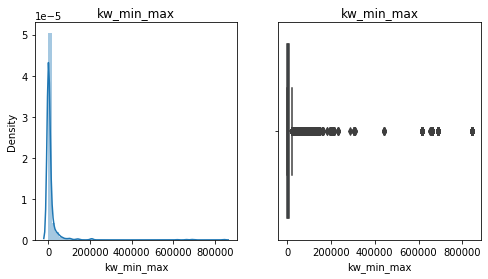

In [ ]:

j= 22
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the lowest number of shares of articles sharing the best performing keyword on the article in question. It would benefit from normalization and standardization.

####kw_max_max

Skewness: -2.644982


count     39644.000000
mean     752324.066694
std      214502.129573
min           0.000000
25%      843300.000000
50%      843300.000000
75%      843300.000000
max      843300.000000
Name: kw_max_max, dtype: float64

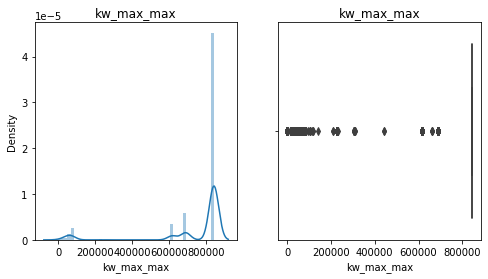

In [ ]:
j= 23
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the highest number of shares of articles sharing the best performing keyword on the article in question. It would benefit from normalization and standardization.

####kw_avg_max

Skewness: 0.624310


count     39644.000000
mean     259281.938083
std      135102.247285
min           0.000000
25%      172846.875000
50%      244572.222223
75%      330980.000000
max      843300.000000
Name: kw_avg_max, dtype: float64

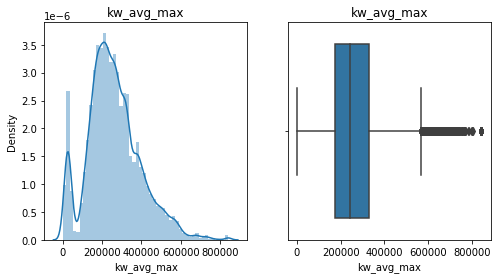

In [ ]:
j= 24
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the average number of shares of articles sharing the best performing keyword on the article in question. It would benefit from standardization.

####kw_min_avg

Skewness: 0.467976


count    39644.000000
mean      1117.146610
std       1137.456951
min         -1.000000
25%          0.000000
50%       1023.635611
75%       2056.781032
max       3613.039820
Name: kw_min_avg, dtype: float64

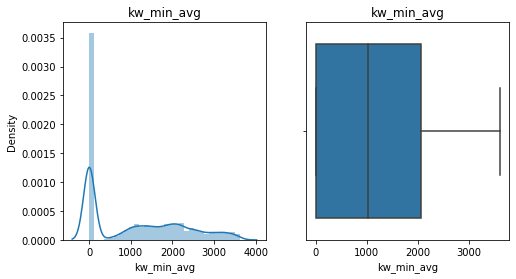

In [ ]:
j= 25
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the minimum number of shares of articles sharing the most average performing keyword on the article in question. It is unclear what an "average" keyword would mean in this context. We will normalize it to keep it in line with the other keyword metrics.

####kw_max_avg

Skewness: 16.411670


count     39644.000000
mean       5657.211151
std        6098.871957
min           0.000000
25%        3562.101631
50%        4355.688836
75%        6019.953968
max      298400.000000
Name: kw_max_avg, dtype: float64

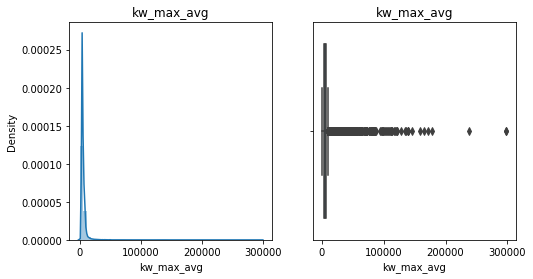

In [ ]:
j= 26
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the greatest number of shares of articles sharing the most average performing keyword on the article in question. it would benefit from normalization and standardization.

####kw_avg_avg

Skewness: 5.760177


count    39644.000000
mean      3135.858639
std       1318.150397
min          0.000000
25%       2382.448566
50%       2870.074878
75%       3600.229564
max      43567.659946
Name: kw_avg_avg, dtype: float64

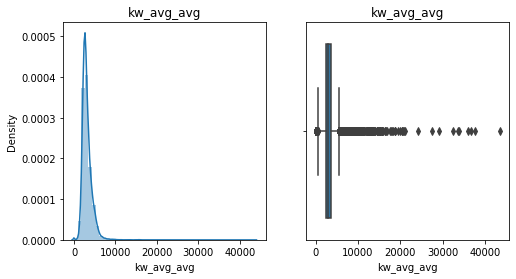

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the average number of shares of articles sharing the most average performing keyword on the article in question. We will normalize and standardize this feature.

####self_reference_min_shares

Skewness: 26.264364


count     39644.000000
mean       3998.755396
std       19738.670516
min           0.000000
25%         639.000000
50%        1200.000000
75%        2600.000000
max      843300.000000
Name: self_reference_min_shares, dtype: float64

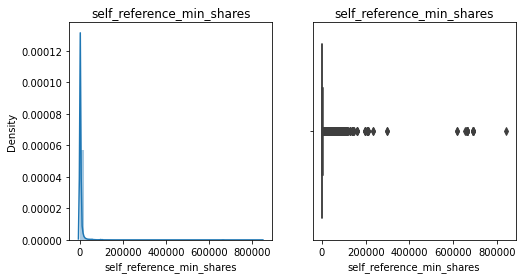

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Min. shares of referenced articles in Mashable; ie if the article references other Mashable articles, what is the number of shares of the least shared referenced article. Should be normalized and standardized.

####self_reference_max_shares

Skewness: 13.870849


count     39644.000000
mean      10329.212662
std       41027.576613
min           0.000000
25%        1100.000000
50%        2800.000000
75%        8000.000000
max      843300.000000
Name: self_reference_max_shares, dtype: float64

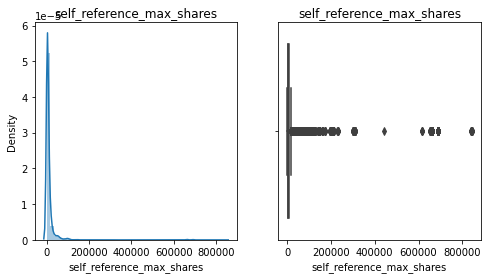

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Max shares of referenced articles in Mashable; ie if the article references other Mashable articles, what is the number of shares of the most shared referenced article. Should be normalized and standardized.

####self_reference_avg_shares

Skewness: 17.914093


count     39644.000000
mean       6401.697580
std       24211.332231
min           0.000000
25%         981.187500
50%        2200.000000
75%        5200.000000
max      843300.000000
Name: self_reference_avg_sharess, dtype: float64

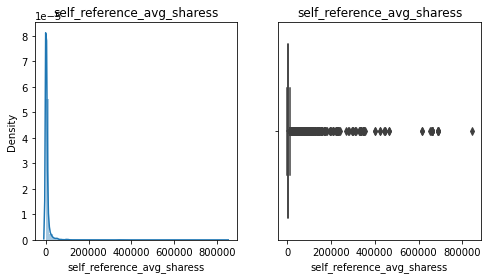

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Average shares of referenced articles in Mashable; ie if the article references other Mashable articles, what is theaverage number of shares of the referenced articles. Should be normalized and standardized.

#### days of the week 
 

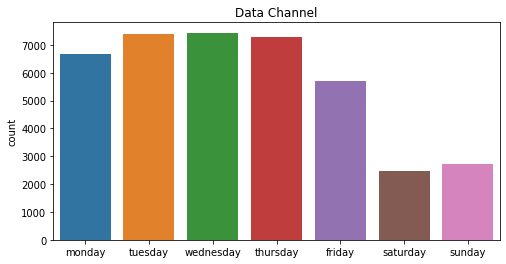

In [ ]:
j= 31 # starting column
h= 38 # ending column 
#assigning columns to a new variable
i= df.iloc[:,j:h]
# creating sum column to check for multiple values
i['sum'] = i.sum(axis=1)
# no mulitple values found droping columning and merging values to one column 
i.drop(columns='sum')
dedummied = i.idxmax(axis=1)

#parsing out category
dedummied = dedummied.str.split('_').apply(lambda x : x[-1])


plt.figure(figsize=(8,4))
#plt.subplot(1,2,1);#Histogram location
plt.title('Day of the week ');
sns.countplot(dedummied);
#plt.subplot(1,2,2);#Boxplot location
#sns.boxplot();
#plt.title(df.columns[j]);
#print("Skewness: %f" %dedummied.skew()) #Adds Skew value
#i.describe() #Adds summary statistics of the variable"""


The Categorical dummy columns represented here: 
31.  weekday_is_monday: Was the article published on a Monday?
32.  weekday_is_tuesday: Was the article published on a Tuesday?
33.  weekday_is_wednesday: Was the article published on a Wednesday?
34.  weekday_is_thursday: Was the article published on a Thursday?
35.  weekday_is_friday: Was the article published on a Friday?
36.  weekday_is_saturday: Was the article published on a Saturday?
37.  weekday_is_sunday: Was the article published on a Sunday?

we can see a significant drop of articles being posted on weekends. If it wasn't already created in the next column we would recommend the creation of an indicator variable.

####is_weekend

Skewness: 2.188500


count    39644.000000
mean         0.130915
std          0.337312
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_weekend, dtype: float64

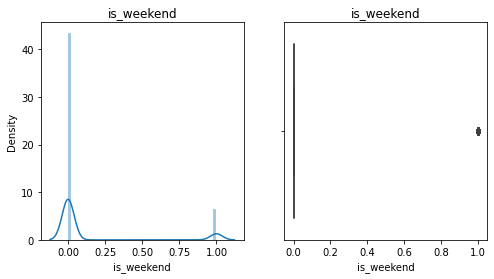

In [ ]:
j= 38
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####LDA_00

Skewness: 1.567463


count    39644.000000
mean         0.184599
std          0.262975
min          0.000000
25%          0.025051
50%          0.033387
75%          0.240958
max          0.926994
Name: LDA_00, dtype: float64

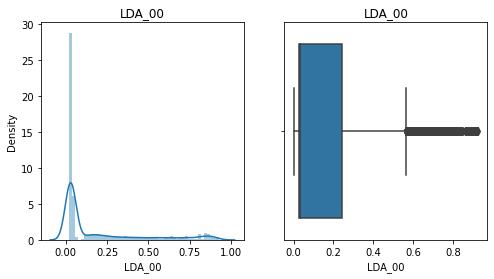

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This score is standardized, but not normalized.

####LDA_01

Skewness: 2.086722


count    39644.000000
mean         0.141256
std          0.219707
min          0.000000
25%          0.025012
50%          0.033345
75%          0.150831
max          0.925947
Name: LDA_01, dtype: float64

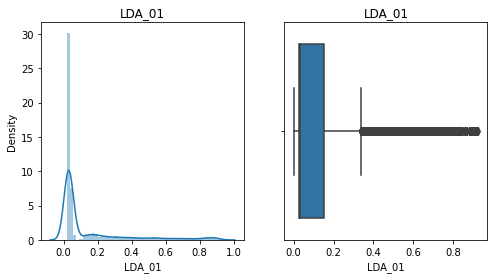

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This score is standardized, but not normalized.

####LDA_02

Skewness: 1.311695


count    39644.000000
mean         0.216321
std          0.282145
min          0.000000
25%          0.028571
50%          0.040004
75%          0.334218
max          0.919999
Name: LDA_02, dtype: float64

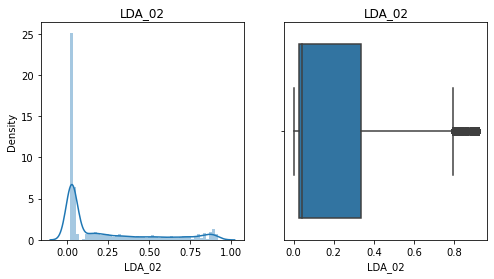

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This score is standardized, but not normalized.

####LDA_03

Skewness: 1.238716


count    39644.000000
mean         0.223770
std          0.295191
min          0.000000
25%          0.028571
50%          0.040001
75%          0.375763
max          0.926534
Name: LDA_03, dtype: float64

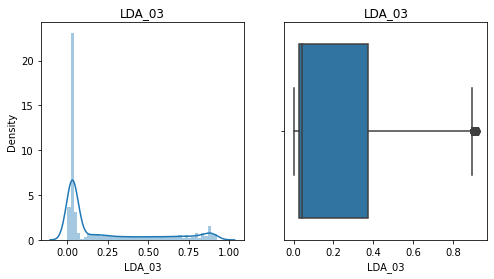

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This score is standardized, but not normalized.

####LDA_04

Skewness: 1.173129


count    39644.000000
mean         0.234029
std          0.289183
min          0.000000
25%          0.028574
50%          0.040727
75%          0.399986
max          0.927191
Name: LDA_04, dtype: float64

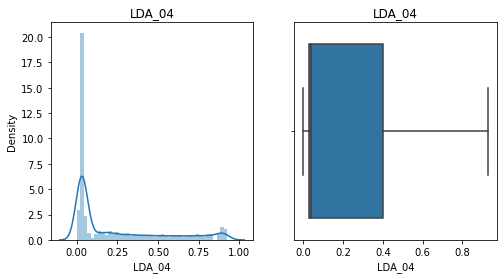

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This score is standardized, but not normalized.

####global_subjectivity

Skewness: -1.372689


count    39644.000000
mean         0.443370
std          0.116685
min          0.000000
25%          0.396167
50%          0.453457
75%          0.508333
max          1.000000
Name: global_subjectivity, dtype: float64

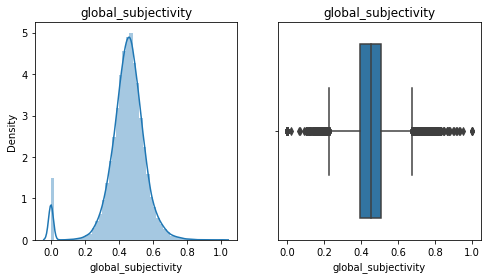

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This column scores an article how subjective (vs objective) an article is. This seems normally distributed, with a small spike of zero values, which would represent fully "factual" articles. No data preperation needed.

####global_sentiment_polarity

Skewness: 0.105457


count    39644.000000
mean         0.119309
std          0.096931
min         -0.393750
25%          0.057757
50%          0.119117
75%          0.177832
max          0.727841
Name: global_sentiment_polarity, dtype: float64

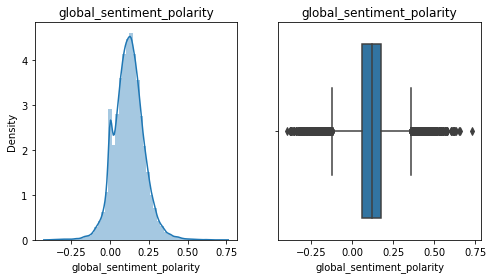

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This variable is an analysis of "public opinion" as calculated from extracted and weighted text. It seems gaussian, and I would expect a high polarity to be strongly predictive of the number of shares. However, I might expect a more controvertial variable to be shared even more (think flame wars). If there is no variable that directly measures this controvetial score, we will create one.

####global_rate_positive_words

Skewness: 0.323047


count    39644.000000
mean         0.039625
std          0.017429
min          0.000000
25%          0.028384
50%          0.039023
75%          0.050279
max          0.155488
Name: global_rate_positive_words, dtype: float64

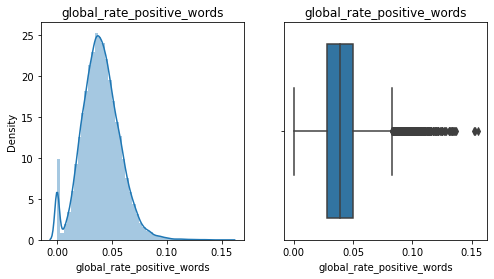

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####global_rate_negative_words

Skewness: 1.491917


count    39644.000000
mean         0.016612
std          0.010828
min          0.000000
25%          0.009615
50%          0.015337
75%          0.021739
max          0.184932
Name: global_rate_negative_words, dtype: float64

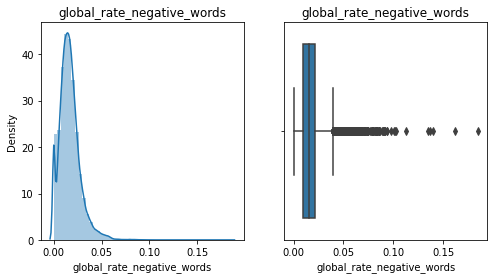

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####rate_positive_words

Skewness: -1.423106


count    39644.000000
mean         0.682150
std          0.190206
min          0.000000
25%          0.600000
50%          0.710526
75%          0.800000
max          1.000000
Name: rate_positive_words, dtype: float64

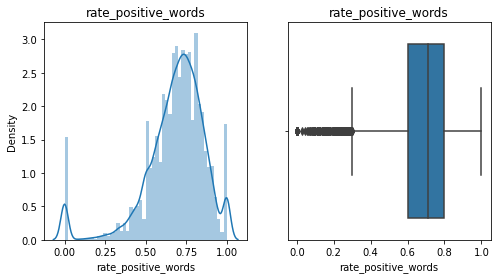

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####rate_negative_words

Skewness: 0.407241


count    39644.000000
mean         0.287934
std          0.156156
min          0.000000
25%          0.185185
50%          0.280000
75%          0.384615
max          1.000000
Name: rate_negative_words, dtype: float64

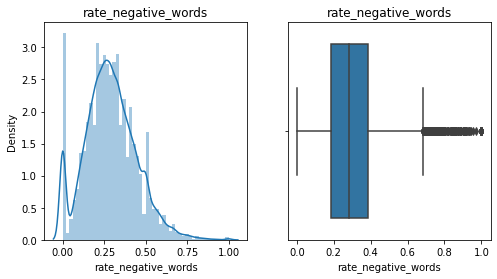

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####avg_positive_polarity

Skewness: -0.724795


count    39644.000000
mean         0.353825
std          0.104542
min          0.000000
25%          0.306244
50%          0.358755
75%          0.411428
max          1.000000
Name: avg_positive_polarity, dtype: float64

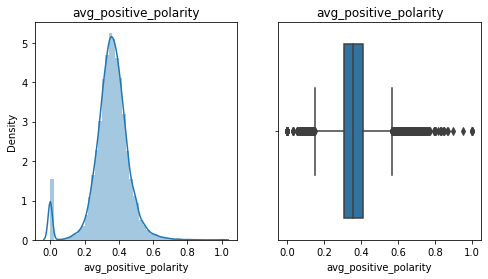

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####min_positive_polarity

Skewness: 3.040468


count    39644.000000
mean         0.095446
std          0.071315
min          0.000000
25%          0.050000
50%          0.100000
75%          0.100000
max          1.000000
Name: min_positive_polarity, dtype: float64

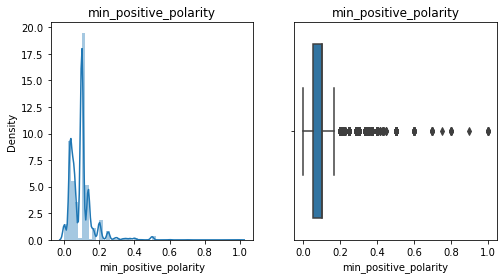

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####max_positive_polarity

Skewness: -0.939756


count    39644.000000
mean         0.756728
std          0.247786
min          0.000000
25%          0.600000
50%          0.800000
75%          1.000000
max          1.000000
Name: max_positive_polarity, dtype: float64

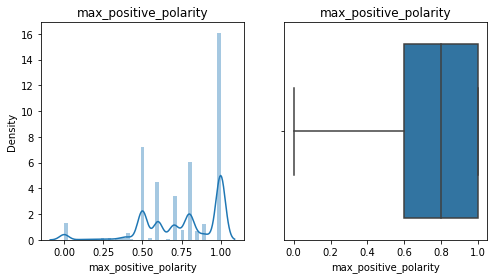

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####avg_negative_polarity

Skewness: -0.551644


count    39644.000000
mean        -0.259524
std          0.127726
min         -1.000000
25%         -0.328383
50%         -0.253333
75%         -0.186905
max          0.000000
Name: avg_negative_polarity, dtype: float64

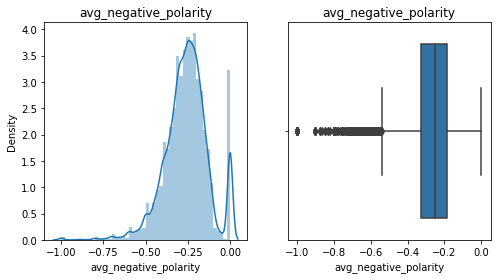

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####min_negative_polarity

Skewness: -0.073155


count    39644.000000
mean        -0.521944
std          0.290290
min         -1.000000
25%         -0.700000
50%         -0.500000
75%         -0.300000
max          0.000000
Name: min_negative_polarity, dtype: float64

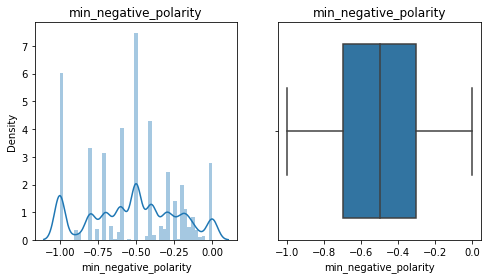

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####max_negative_polarity

Skewness: -3.459747


count    39644.000000
mean        -0.107500
std          0.095373
min         -1.000000
25%         -0.125000
50%         -0.100000
75%         -0.050000
max          0.000000
Name: max_negative_polarity, dtype: float64

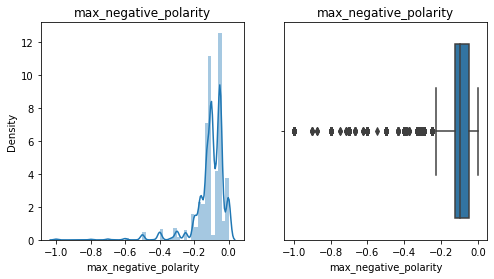

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####title_subjectivity

Skewness: 0.816085


count    39644.000000
mean         0.282353
std          0.324247
min          0.000000
25%          0.000000
50%          0.150000
75%          0.500000
max          1.000000
Name: title_subjectivity, dtype: float64

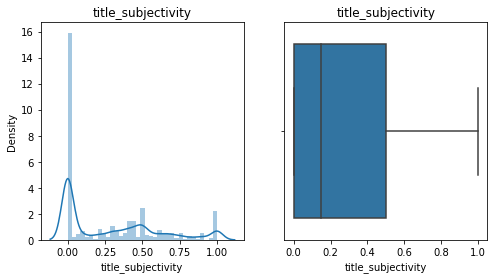

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####title_sentiment_polarity

Skewness: 0.396109


count    39644.000000
mean         0.071425
std          0.265450
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.150000
max          1.000000
Name: title_sentiment_polarity, dtype: float64

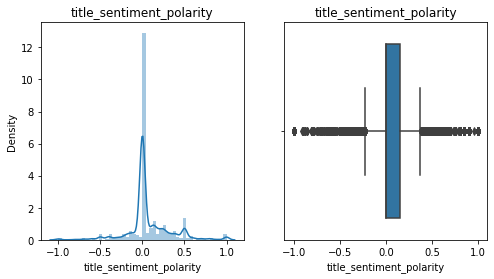

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####abs_title_subjectivity

Skewness: -0.624149


count    39644.000000
mean         0.341843
std          0.188791
min          0.000000
25%          0.166667
50%          0.500000
75%          0.500000
max          0.500000
Name: abs_title_subjectivity, dtype: float64

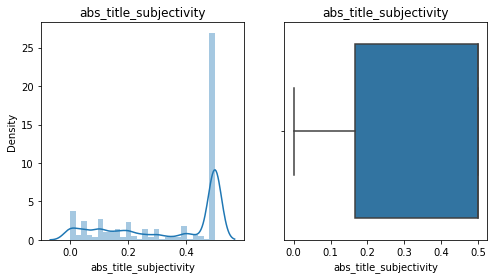

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

####abs_title_sentiment_polarity

Skewness: 1.704193


count    39644.000000
mean         0.156064
std          0.226294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: abs_title_sentiment_polarity, dtype: float64

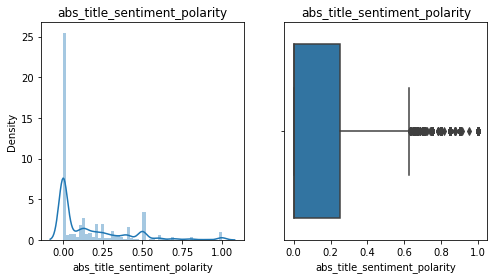

In [ ]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

###Summary Notes:

todo list for nextsteps
1. Drop url and timedelta columns
2. Drop row 31037 which contains an extreme outlier
3. Standardize
> *  n_tokens_content
> * num_hrefs
> * num_self_hrefs
> * num_imgs
> * num_videos
4. Normalize
> * num_hrefs
> * num_self_hrefs
> * num_imgs
> * num_videos




Jacob eda reviews




##Feature Selection & Dimensionality Reduction
Replace original correlated features with orthogonal (uncorrelated) data. Never apply SVD or PCA to qualitative data (categorical).

Use PCA on large numercal feature sets. use other feature selection tools on small numbers of variables, becaus ePCA is computationaly expensive.

I should do this first on full (not categorical) dataset.

Can use Variance threshold [not correlation] forward/backward and VIF on categorical values

## Train/Cross Validate Regression Model


